In [1]:
import pickle
import tcav.utils_plot as utils_plot 
import os

print(os.getcwd())

/zhome/94/5/127021/speciale/tcav


In [2]:
name = 'results_pickle/results_zebra_50010.pkl'
# 'results_pickle/results_zebra_50010.pkl' 
# 'results_pickle/results_zebra_505.pkl'
# 'results_pickle/result_random500_100_to_102.pkl'

with open(name, 'rb') as f:
    data = pickle.load(f)

>>> Number of TCAV concept observations <<<
 500
>>> Number of TCAV random observations <<<
 4990


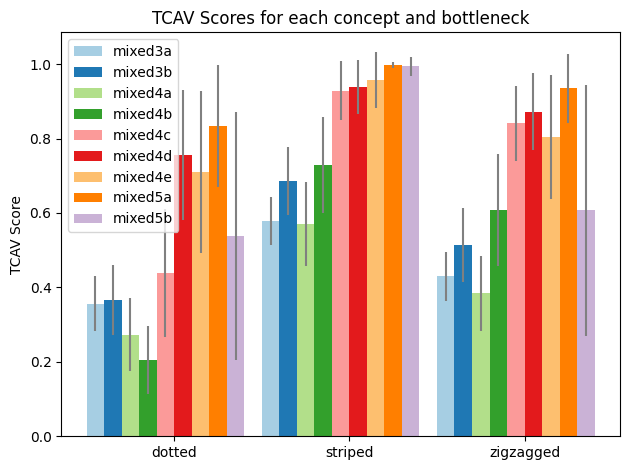

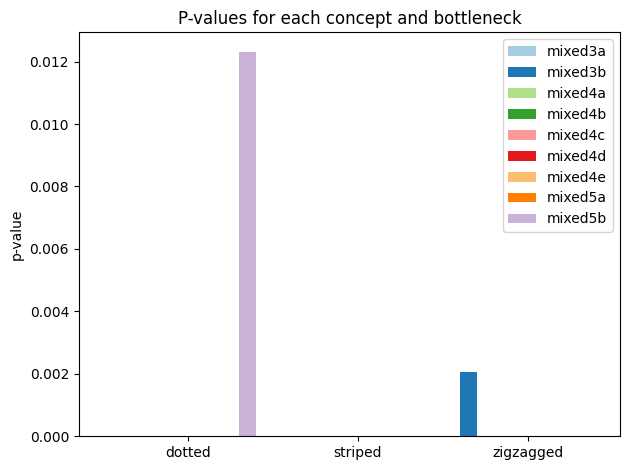

In [4]:
t_test_mean = 0.5 # None # if value given this will be a 1 sample t-test
bonferroni_nr = 2 #7
alternative = 'two-sided' # 'less' # 'greater' 
distribution_info = utils_plot.plot_results(data, num_random_exp=10, plot_hist = False,min_p_val=0.05, bonferroni_nr = bonferroni_nr,
alternative = alternative, t_test_mean = t_test_mean , save_fig = False)